In [1]:
from google.colab import files
uploaded = files.upload()


Saving 23253521_kayit1.wav to 23253521_kayit1.wav
Saving 23253521_kayit2.wav to 23253521_kayit2.wav


In [2]:
import numpy as np
import soundfile as sf

x1, fs1 = sf.read("23253521_kayit1.wav")
x2, fs2 = sf.read("23253521_kayit2.wav")

print("Kayıt1 uzunluk:", len(x1), "örnekleme frekansı:", fs1)
print("Kayıt2 uzunluk:", len(x2), "örnekleme frekansı:", fs2)


Kayıt1 uzunluk: 93184 örnekleme frekansı: 44100
Kayıt2 uzunluk: 129368 örnekleme frekansı: 44100


In [3]:
def sinyal_istatistik(x):
    max_val = np.max(x)
    min_val = np.min(x)
    std_val = np.std(x)
    enerji = np.sum(x**2)
    guc = enerji / len(x)
    return max_val, min_val, std_val, enerji, guc

istat1 = sinyal_istatistik(x1)
istat2 = sinyal_istatistik(x2)

print("Kayıt 1 İstatistikleri: Max={}, Min={}, Std={}, Enerji={}, Güç={}".format(*istat1))
print("Kayıt 2 İstatistikleri: Max={}, Min={}, Std={}, Enerji={}, Güç={}".format(*istat2))


Kayıt 1 İstatistikleri: Max=0.534088134765625, Min=-0.43096923828125, Std=0.07435488705099239, Enerji=1030.363299742341, Güç=0.01105729846049044
Kayıt 2 İstatistikleri: Max=0.29022216796875, Min=-0.235076904296875, Std=0.02664820975768351, Enerji=183.73547151871026, Güç=0.0014202544023151804


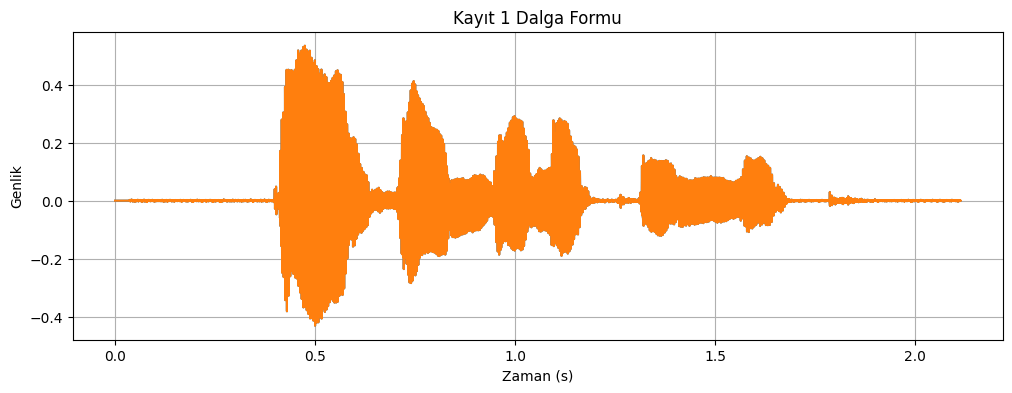

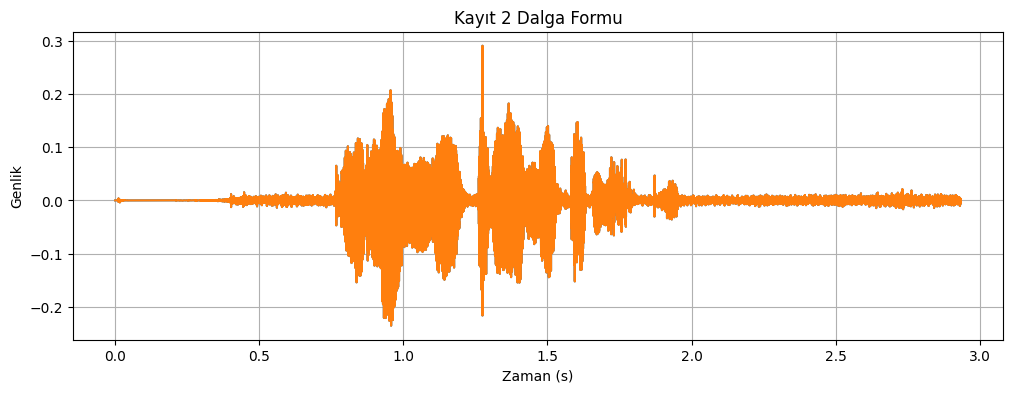

In [4]:
import matplotlib.pyplot as plt

t1 = np.arange(len(x1)) / fs1
t2 = np.arange(len(x2)) / fs2

plt.figure(figsize=(12,4))
plt.plot(t1, x1)
plt.title("Kayıt 1 Dalga Formu")
plt.xlabel("Zaman (s)")
plt.ylabel("Genlik")
plt.grid()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(t2, x2)
plt.title("Kayıt 2 Dalga Formu")
plt.xlabel("Zaman (s)")
plt.ylabel("Genlik")
plt.grid()
plt.show()


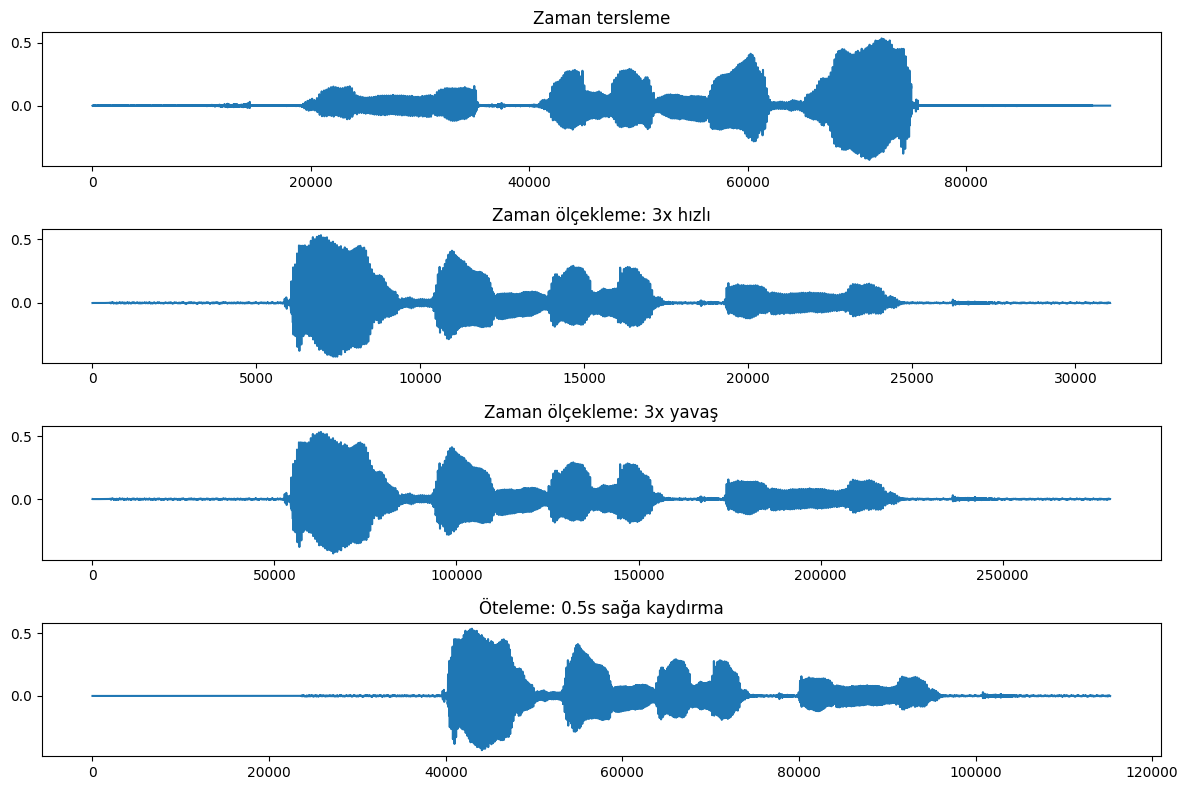

In [5]:
from scipy.signal import resample

if x1.ndim > 1:
    x1 = np.mean(x1, axis=1)


x1_rev = x1[::-1]


x1_fast = resample(x1, len(x1)//3)
x1_slow = resample(x1, len(x1)*3)


delay_samples = int(0.5 * fs1)
x1_shift = np.concatenate((np.zeros(delay_samples), x1))


plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(x1_rev)
plt.title("Zaman tersleme")

plt.subplot(4,1,2)
plt.plot(x1_fast)
plt.title("Zaman ölçekleme: 3x hızlı")

plt.subplot(4,1,3)
plt.plot(x1_slow)
plt.title("Zaman ölçekleme: 3x yavaş")

plt.subplot(4,1,4)
plt.plot(x1_shift)
plt.title("Öteleme: 0.5s sağa kaydırma")

plt.tight_layout()
plt.show()


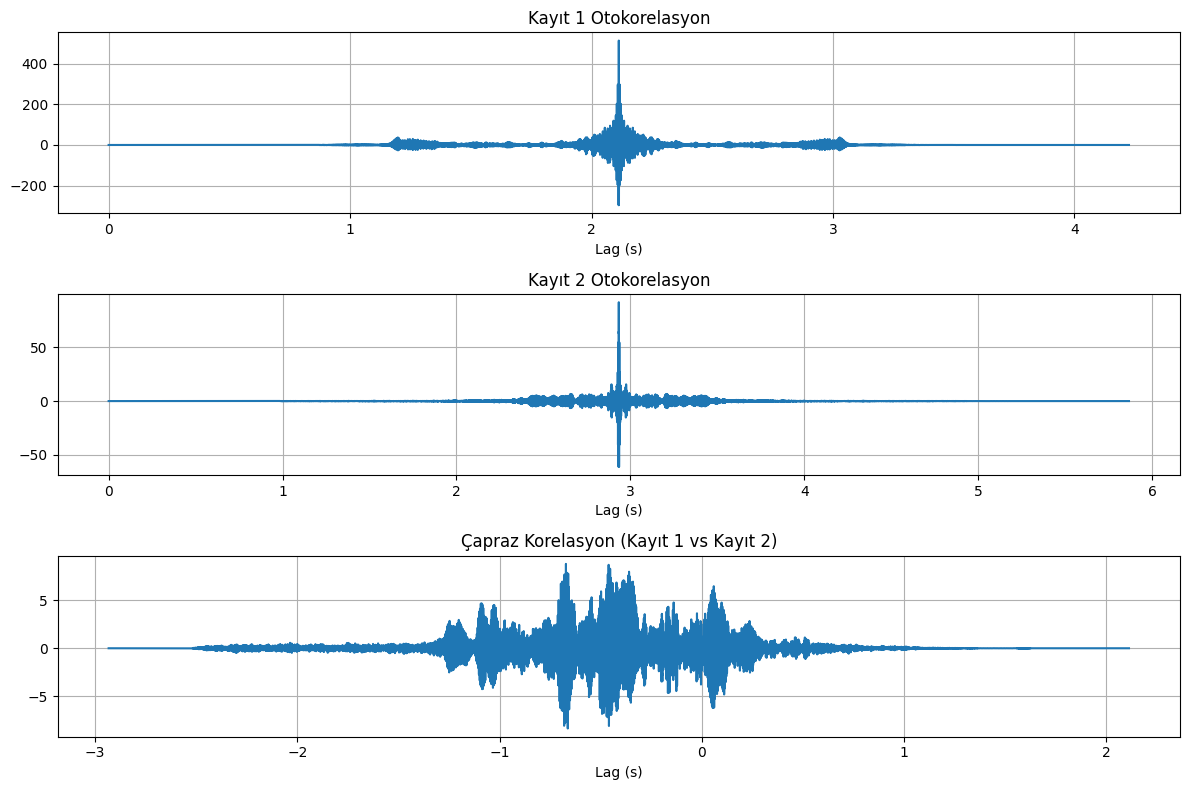

In [6]:

from scipy.signal import correlate
if x1.ndim > 1:
    x1_mono = np.mean(x1, axis=1)
else:
    x1_mono = x1.copy()

if x2.ndim > 1:
    x2_mono = np.mean(x2, axis=1)
else:
    x2_mono = x2.copy()


if fs1 != fs2:
    from scipy.signal import resample
    new_len = int(len(x2_mono) * fs1 / fs2)
    x2_mono = resample(x2_mono, new_len)
    fs2 = fs1


auto1 = correlate(x1_mono, x1_mono, mode='full')
auto2 = correlate(x2_mono, x2_mono, mode='full')
cross = correlate(x1_mono, x2_mono, mode='full')

lags = np.arange(-len(x2_mono)+1, len(x1_mono))
lags_sec = lags / fs1

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot(np.arange(len(auto1))/fs1, auto1)
plt.title("Kayıt 1 Otokorelasyon")
plt.xlabel("Lag (s)")
plt.grid()

plt.subplot(3,1,2)
plt.plot(np.arange(len(auto2))/fs1, auto2)
plt.title("Kayıt 2 Otokorelasyon")
plt.xlabel("Lag (s)")
plt.grid()

plt.subplot(3,1,3)
plt.plot(lags_sec, cross)
plt.title("Çapraz Korelasyon (Kayıt 1 vs Kayıt 2)")
plt.xlabel("Lag (s)")
plt.grid()

plt.tight_layout()
plt.show()